# An Analysis of Student Alcohol Consumption and Academic Performance
By. Liam Egan, 2021

## Introduction

The University of Camerino and the University of California Irvine have released an interesting pair of datasets regarding weekly alcohol consumption for Portuguese secondary school students(15-22). The data sets were a result of collecting both school reports and questionnaires from Portuguese students. The data sets also contains a lot of interesting demographic questions regarding the students relationship status, parental status, social life, etc. that reveal a lot of interesting social and gender study information about the students. The goal of this tutorial is to walk users through the entire data science pipeline. So, by the end of this tutorial the user will have a better understanding of the data science process as a whole. 

Why is this important? Well, to quote the late great Benjamin Franklin “An investment in knowledge pays the best interest”, by examining how alcohol consumption affects a students performance we’ll see the correlation between binge drinking and negative grades and little to moderate drinking and better grades. By examining when students binge drink and why they binge drink we can get a better understanding of the situation as a whole. In the end of this tutorial we'll be able to make a prediction based on the data as to whether or not a student passed both of their courses.

## Data Collection

### Libraries:

Q: What are Libraries?

A: A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs. It makes Python Programming simpler and convenient for the programmer. [Answer, along with more info is available here!](https://www.geeksforgeeks.org/libraries-in-python/)

You will need to install the following Python libraries
- [pandas](https://pandas.pydata.org/about/)
- [numpy](https://numpy.org/doc/stable/user/whatisnumpy.html)
- [matplotlib](https://matplotlib.org/stable/users/index.html)
- [seaborn](https://seaborn.pydata.org/tutorial.html)
- [statsmodels](https://www.statsmodels.org/stable/index.html)
- [sklearn](https://scikit-learn.org/stable/user_guide.html)

To install these libraries you will need to execute the following commands:

- conda install library_name
    
OR
    
- pip install library_name

Note: These commands will only run if you have [pip](https://pip.pypa.io/en/stable/cli/pip_install/) or [anaconda](https://docs.anaconda.com/anaconda/install/index.html) installed 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sea
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import tree
from sklearn.model_selection import train_test_split

### A Tale of Two Datasets:

There are two datasets here. The first data set contains 396 students sampled and compares their survey results to their grade recived in a mathematics course. The second data set contains 650 students and the same column types, but compares their survey results to their grade recieved in a Portuguese course, the two datasets are modeled under binary/five-level classification and regression tasks.

The Data can be found [HERE](http://archive.ics.uci.edu/ml/datasets/Student+Performance)

Here is a breakdown of the data set:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary - --education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

- These grades are related with the course subject, Math or Portuguese:

31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

Enough talking about the data sets lets get them!

In [2]:
# Get the results from Portuguese grades
por_res = pd.read_csv("student-por.csv")

# Get the results from mathematics grades
mat_res = pd.read_csv("student-mat.csv")

In [3]:
# Display head of Portuguese data set 
por_res.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
# Display head of mathematics data set
mat_res.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Merging and Cleaning our Data:

Now that we have gathered our two data sets from our csv files we need to merge the two data sets into one so we'll have an easier time managing our data. While I do acknowledge that merging the two data sets together may be tempting, please avoid this! This can cause the same student to be counted twice in our data analysis which will skew our data. However, luckily for us UC Irvine has posted on their website that there exists 382 students that exist in both data sets and gave us the merging keys to obtain them. So let's go ahead and obtain them and get our new data set to perform analysis on. 

In [5]:
# Rename Final Grade Scores
mat_res.rename(columns={'G1':'G1_Mat', 'G2':'G2_Mat', 'G3':'G3_Mat'}, inplace=True)
por_res.rename(columns={'G1':'G1_Por', 'G2':'G2_Por', 'G3':'G3_Por'}, inplace=True)

# Merge according UC Irvine's instruction
student_res = pd.merge(mat_res, por_res, on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

# Delete duplicates
del student_res["famrel_y"]
del student_res["romantic_y"]
del student_res["higher_y"]
del student_res["activities_y"]
del student_res["freetime_y"]
del student_res["famsup_y"]
del student_res["goout_y"]
del student_res["failures_y"]
del student_res["studytime_y"]
del student_res["traveltime_y"]
del student_res["guardian_y"]
del student_res["schoolsup_y"]
del student_res["paid_y"]
del student_res["Dalc_y"]
del student_res["Walc_y"]
del student_res["health_y"]
del student_res["absences_y"]

# Rename columns to prettify
student_res.rename(columns={'famrel_x':'famrel', 'romantic_x':'romantic', 'higher_x':'higher'
                       , 'activities_x':'activities', 'freetime_x':'freetime', 'famsup_x':'famsup'
                       , 'goout_x':'goout', 'failures_x':'failures', 'studytime_x':'studytime'
                       , 'traveltime_x':'traveltime', 'guardian_x':'guardian', 'schoolsup_x':'schoolsup'
                       , 'paid_x':'paid', 'Dalc_x':'Dalc', 'Walc_x':'Walc', 'health_x':'health',
                            'absences_x':'absences'}, inplace=True)
# Display data
student_res.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1_Mat,G2_Mat,G3_Mat,G1_Por,G2_Por,G3_Por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,11,13,13


## Exploratory Data Analysis

Q: We have successfully moved our data from our two csv files into a dataframe, but how do we interpret it?

A: What we need to do next is explore what our data means through various visuals to identify any obvious trends. We can use our two import libraries matplotlib and seaborn to accomplish this, this process is known as exploratory data analysis or EDA for short. [Here's the more formal definition](https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm).

From looking at the raw data and from the reading the data's description on UC Irvine's website let's look out for three areas within our data

1. Does gender or age affect alcohol consumption?
2. How does family or social life affect alcohol consumption?
3. Does alcohol consumption affect a student's test scores?

### Is There a Relation Between Gender and Alcohol Consumption?

Text(0, 0.5, 'Number of Students')

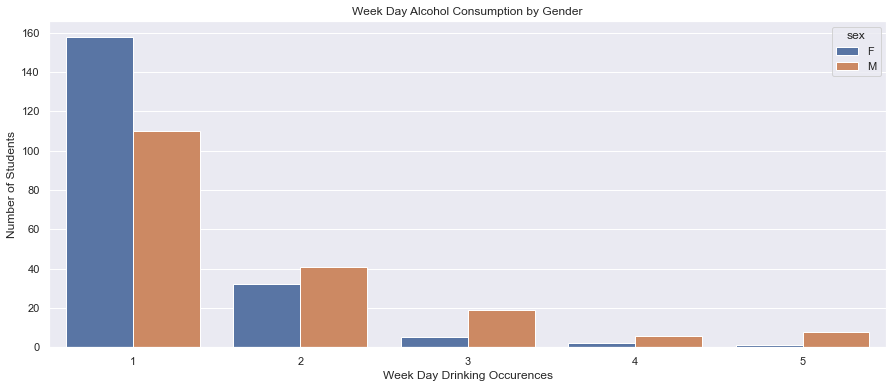

In [6]:
# Daily alcohol consumption by gender
sea.set(rc={'figure.figsize':(15,6)})
ax = sea.countplot(x="Dalc", hue ="sex", data=student_res)
ax.set_title("Week Day Alcohol Consumption by Gender")
ax.set_xlabel("Week Day Drinking Occurences")
ax.set_ylabel("Number of Students")

Text(0, 0.5, 'Number of Students')

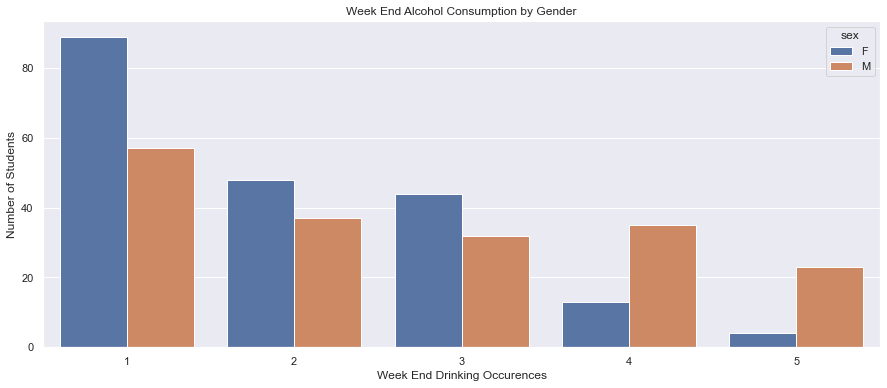

In [7]:
# Weekend alcohol consumption by gender
sea.set(rc={'figure.figsize':(15,6)})
ax = sea.countplot(x="Walc", hue ="sex", data=student_res)
ax.set_title("Week End Alcohol Consumption by Gender")
ax.set_xlabel("Week End Drinking Occurences")
ax.set_ylabel("Number of Students")

Just to clarify that we are starting off by splitting the data by sexs because it's one of the easiest ways for us to observe the data. To be specific, we are checking which gender drinks more regularly. 

From the above graph we notice that men clearly drink more than women (1 being low, 5 being very high). On weekdays it appears that most people tend to drink less than they do on the weekends. What's interesting about the weekend statistics is that men's drinking habits on the weekends tend to be fairly even or there's more than one significant peak while the females tend to be more skewed.

### Is There a Relation With Age and Drinking Habits?

Text(0, 0.5, 'Number of Driking Occurences')

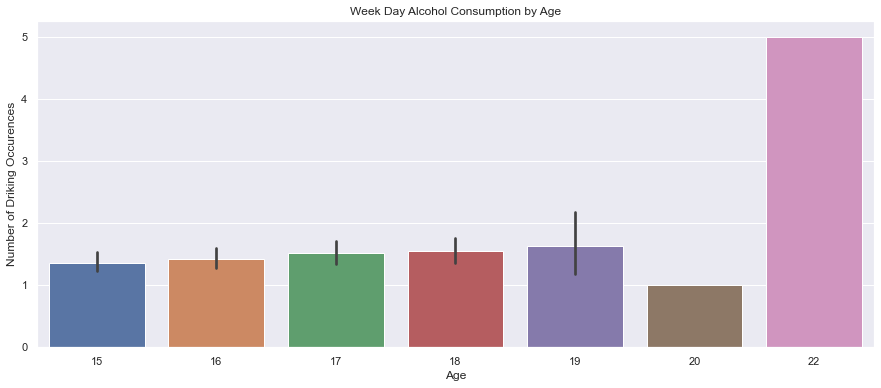

In [8]:
# Weekday alcohol consumption by Age
sea.set(rc={'figure.figsize':(15,6)})
ax = sea.barplot(x="age", y ="Dalc", data=student_res)
ax.set_title("Week Day Alcohol Consumption by Age")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Driking Occurences")

Text(0, 0.5, 'Number of Driking Occurences')

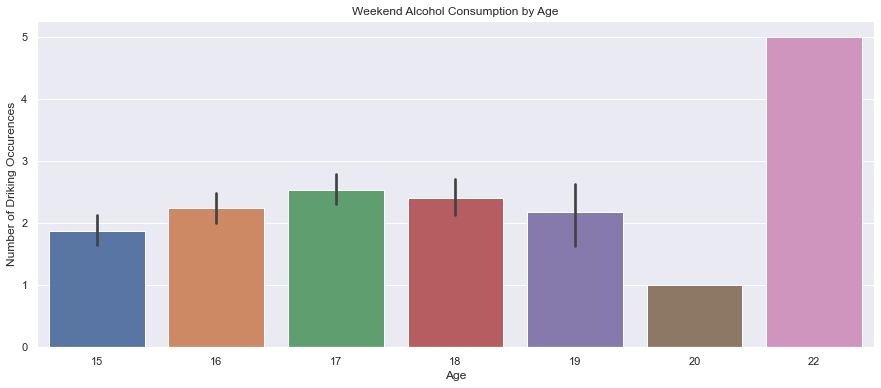

In [9]:
# Weekend alcohol consumption by Age
sea.set(rc={'figure.figsize':(15,6)})
ax = sea.barplot(x="age", y ="Walc", data=student_res)
ax.set_title("Weekend Alcohol Consumption by Age")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Driking Occurences")

From the above graph what we see is students aged 22 tend to drink more heavily than their younger counterparts. What's interesting about these graphs is that students from the 15-19 tend to have a fairly uniform distribution. However at the age 20 the number of drinking occurrences drops significantly then spikes very high at age 22. One assumption that can be made by looking at this is that there is potentially a lack of 20-22 year old students in the sampled data which makes their distributions to be more extreme when compared to the 15-19 year old students. This is perhaps due to more students completing secondary school by 19 so there is a lack of information reguarding 20 and 22 year olds. 

### Is There a Relation Between Parental Cohabitation Status and Drinking?

Text(0, 0.5, 'Number of Driking Occurences')

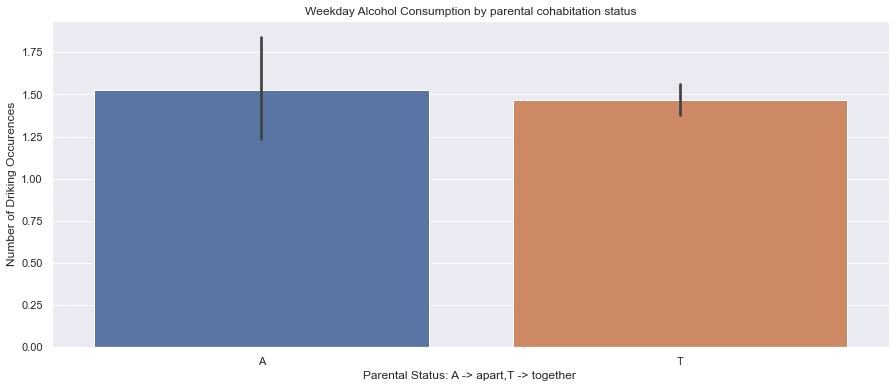

In [10]:
# Weekday alcohol consumption by parental cohabitation status
sea.set(rc={'figure.figsize':(15,6)})
ax = sea.barplot(x="Pstatus", y ="Dalc", data=student_res)
ax.set_title("Weekday Alcohol Consumption by parental cohabitation status")
ax.set_xlabel("Parental Status: A -> apart,T -> together ")
ax.set_ylabel("Number of Driking Occurences")

Text(0, 0.5, 'Number of Driking Occurences')

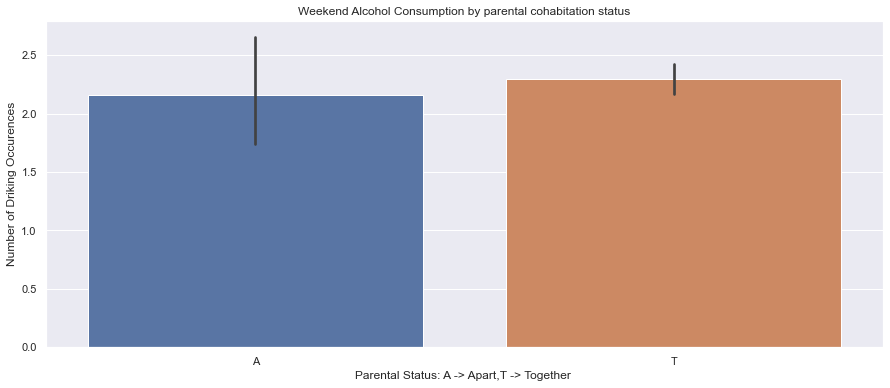

In [11]:
# Weekend alcohol consumption by parental cohabitation status
sea.set(rc={'figure.figsize':(15,6)})
ax = sea.barplot(x="Pstatus", y ="Walc", data=student_res)
ax.set_title("Weekend Alcohol Consumption by parental cohabitation status")
ax.set_xlabel("Parental Status: A -> Apart,T -> Together ")
ax.set_ylabel("Number of Driking Occurences")

From the graphs we notice similar drinking habits between students whose parents are apart and parents who are together. However, we see that students whose parents are apart tend to drink slightly more on weekdays than students whose parents are together. Students whose parents are together tended to drink slightly more on weekends than students whose parents are apart. 

### Is There a Relationship Between a Students Home Address and Alcohol Consumption?

Text(0, 0.5, 'Number of Students')

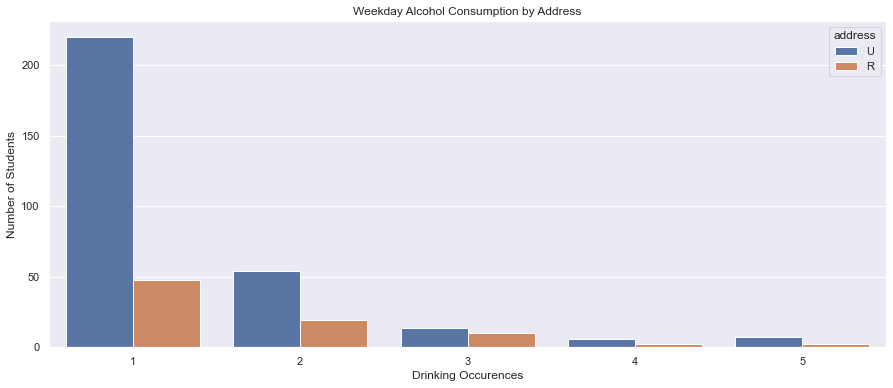

In [12]:
# Weekday alcohol consumption by address
sea.set(rc={'figure.figsize':(15,6)})
ax = sea.countplot(x="Dalc", hue ="address", data=student_res)
ax.set_title("Weekday Alcohol Consumption by Address")
ax.set_xlabel("Drinking Occurences")
ax.set_ylabel("Number of Students")

Text(0, 0.5, 'Number of Students')

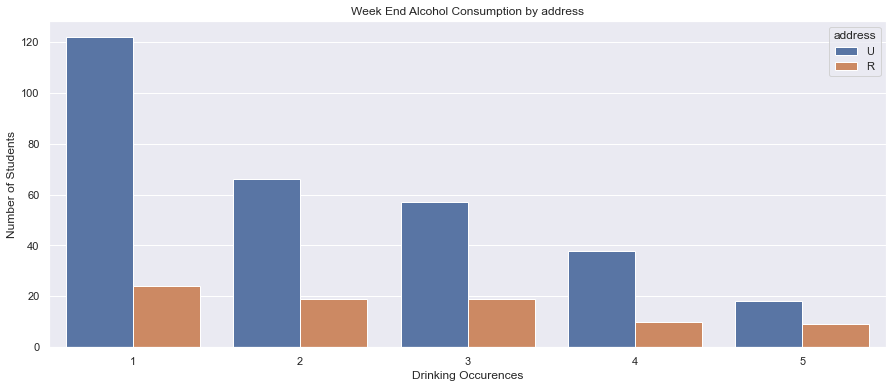

In [13]:
# Weekend alcohol consumption by address
sea.set(rc={'figure.figsize':(15,6)})
ax = sea.countplot(x="Walc", hue ="address", data=student_res)
ax.set_title("Week End Alcohol Consumption by address")
ax.set_xlabel("Drinking Occurences")
ax.set_ylabel("Number of Students")

This is interesting, what is clear here is that students who live in urban environments are much more likely to drink more alcohol than students who live in rural environments. I'm not exactly sure as to why this would occur, perhaps the availability of alcohol in urban areas is higher than in rural areas, but nonetheless, still an important observation

### Is There a Relation Between More Social Students and Drinking Habits?

Text(0, 0.5, 'Number of Driking Occurences')

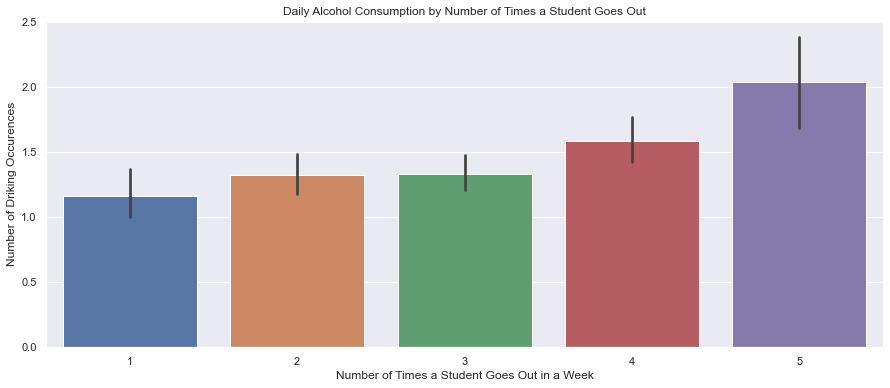

In [14]:
# Weekday alcohol consumption by Number of Times a Student Goes Out
sea.set(rc={'figure.figsize':(15,6)})
ax = sea.barplot(x="goout", y ="Dalc", data=student_res)
ax.set_title("Daily Alcohol Consumption by Number of Times a Student Goes Out")
ax.set_xlabel("Number of Times a Student Goes Out in a Week")
ax.set_ylabel("Number of Driking Occurences")

Text(0, 0.5, 'Number of Driking Occurences')

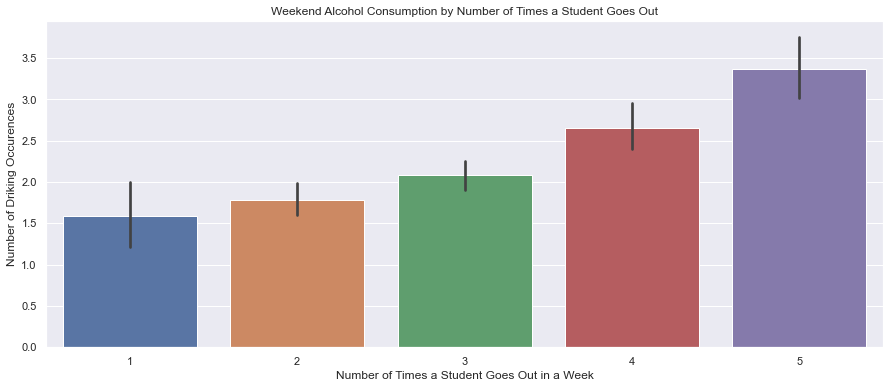

In [15]:
# Weekend alcohol consumption by The Number of Times a Student Goes Out
sea.set(rc={'figure.figsize':(15,6)})
ax = sea.barplot(x="goout", y ="Walc", data=student_res)
ax.set_title("Weekend Alcohol Consumption by Number of Times a Student Goes Out")
ax.set_xlabel("Number of Times a Student Goes Out in a Week")
ax.set_ylabel("Number of Driking Occurences")

What the Above Data Shows is that students who go out more are more likely to drink more throughout the week. This is probably due to the social aspect of drinking.

## Hypothesis Testing

Now that we have explored some of our unpredictable factors let us explore the factors that we can predict. Specifically let us test this hypothesis: students who consume more alcohol have worse test scores than students who consume less. This stage of data interpretation is called hypothesis testing and usually occurs after we conduct our EDA, since now we can make a more accurate prediction of what the data may read, one way to test is for us to graph our data on a scatter plot and use linear regression to predict the trend of the data, which is what we shall do. 

Further readings:
- [Hypothesis Testing](https://www.britannica.com/science/statistics/Hypothesis-testing)
- [Linear Regression](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)

Before we make our linear regression graph, let's explore what our student tests scores look like as a whole. 

<AxesSubplot:ylabel='Density'>

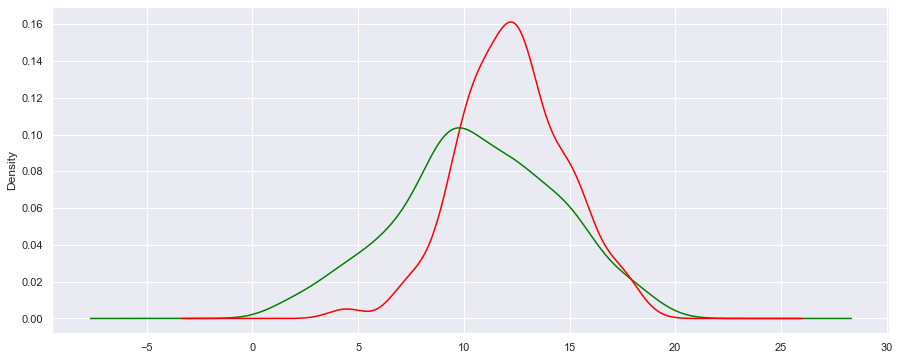

In [16]:
# A function for getting the average maths grade over three periods
def avg_grade_maths(student):
    avg = (student["G1_Mat"] + student["G2_Mat"] + student["G3_Mat"]) / 3 
    return avg

# A function for getting the average portuguese over three periods
def avg_grade_por(student):
    avg = (student["G1_Por"] + student["G2_Por"] + student["G3_Por"]) / 3
    return avg

# Add new columns to the existing dataframe
student_res["Average_Mat"] = student_res.apply(lambda row: avg_grade_maths(row), axis = 1)
student_res["Average_Por"] = student_res.apply(lambda row: avg_grade_por(row), axis = 1)

# Plot new columns on a density graph
student_res['Average_Mat'].plot(kind = "density", color = 'green')
student_res['Average_Por'].plot(kind = "density", color = 'red')

So what we notice from the above graph is that the Math grades (green) is noticeably lower than that of the Portuguese grades(red) across all students regardless of drinking habits. 

Now let's examine if there's a relation between student alcohol consumption and final grades using a box and whisker plot.

Text(0, 0.5, 'Math Test Scores')

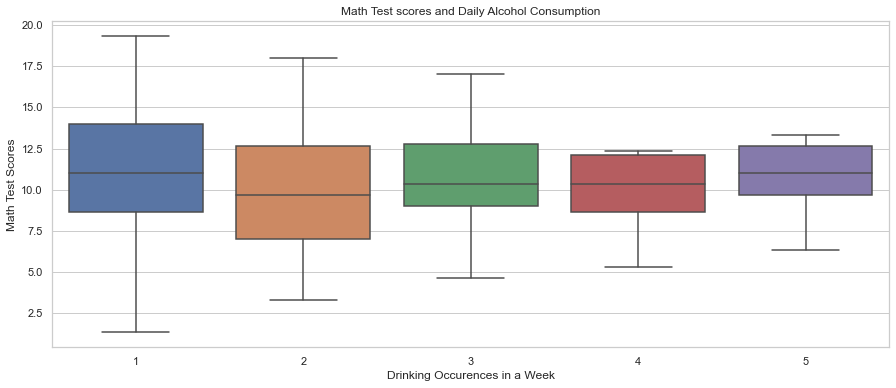

In [17]:
# Plot daily alcohol consumption and average math scores
sea.set_theme(style="whitegrid")
ax = sea.boxplot(x=student_res["Dalc"], y=student_res["Average_Mat"], data= student_res)
ax.set_title("Math Test scores and Daily Alcohol Consumption")
ax.set_xlabel("Drinking Occurences in a Week")
ax.set_ylabel("Math Test Scores")

Text(0, 0.5, 'Math Test Scores')

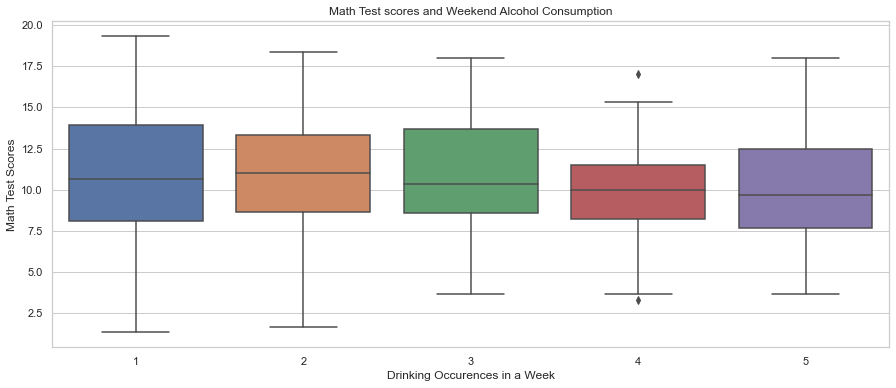

In [18]:
# Plot weekend alcohol consumption and average math score
sea.set_theme(style="whitegrid")
ax = sea.boxplot(x=student_res["Walc"], y=student_res["Average_Mat"], data= student_res)
ax.set_title("Math Test scores and Weekend Alcohol Consumption")
ax.set_xlabel("Drinking Occurences in a Week")
ax.set_ylabel("Math Test Scores")

Text(0, 0.5, 'Portuguese Test Scores')

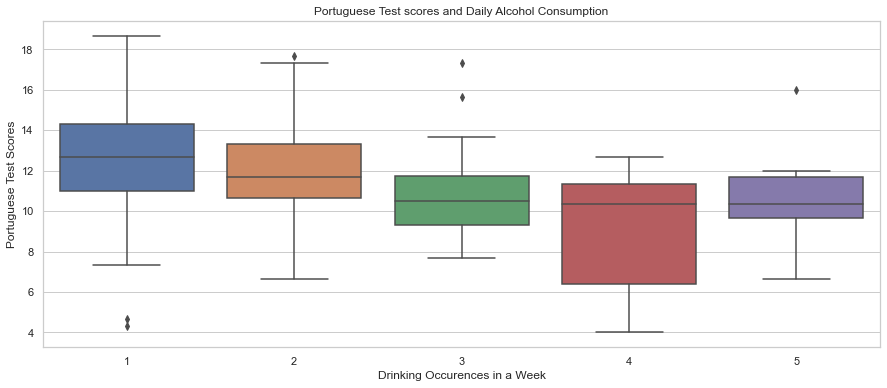

In [19]:
# Plot daily alcohol consumption and average portugese scores
sea.set_theme(style="whitegrid")
ax = sea.boxplot(x=student_res["Dalc"], y=student_res["Average_Por"], data= student_res)
ax.set_title("Portuguese Test scores and Daily Alcohol Consumption")
ax.set_xlabel("Drinking Occurences in a Week")
ax.set_ylabel("Portuguese Test Scores")

Text(0, 0.5, 'Portuguese Test Scores')

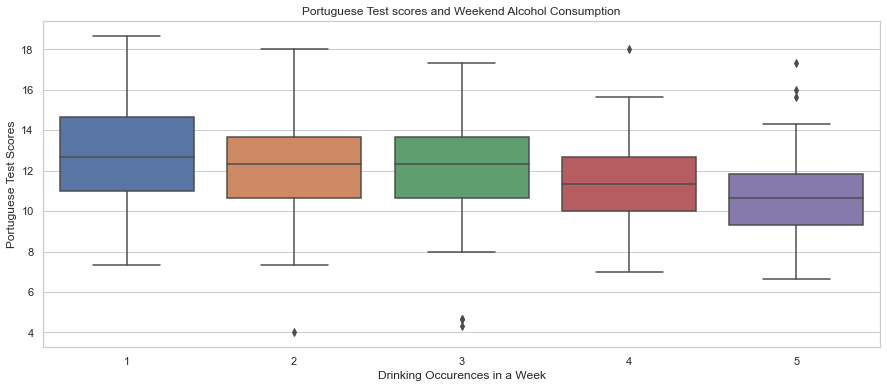

In [20]:
# Plot weekend alcohol consumption and average portugese scores
sea.set_theme(style="whitegrid")
ax = sea.boxplot(x=student_res["Walc"], y=student_res["Average_Por"], data= student_res)
ax.set_title("Portuguese Test scores and Weekend Alcohol Consumption")
ax.set_xlabel("Drinking Occurences in a Week")
ax.set_ylabel("Portuguese Test Scores")

What we see from the box and whisker plots above is that there is a general downwards slope in test scores as alcohol consumption increases. This aligns with our initial hypothesis that students who consume more alcohol generally perform worse in school. However, to verify this we need to check it on a scatter plot with a linear regression model to see if there's a trend. 

Text(0, 0.5, 'Math Test Score')

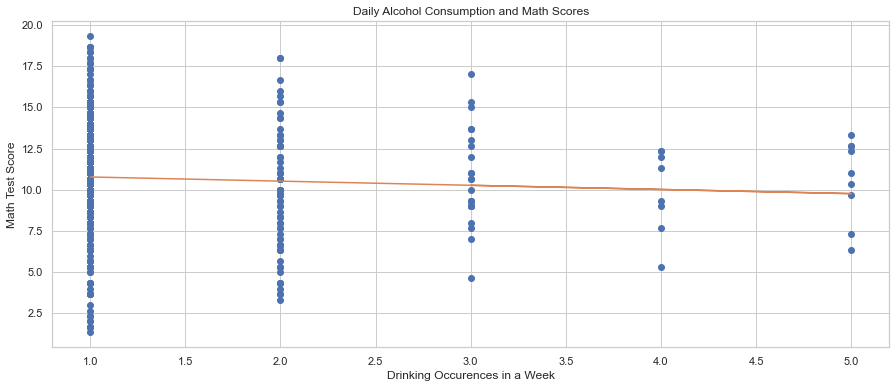

In [21]:
# Scatter Plot for Daily Alcohol Consumption and Math Scores
plt.plot(student_res["Dalc"],student_res["Average_Mat"], "o")
m, b = np.polyfit(student_res["Dalc"], student_res["Average_Mat"], 1)
plt.plot(student_res["Dalc"], m*student_res["Dalc"] + b)
plt.title("Daily Alcohol Consumption and Math Scores")
plt.xlabel("Drinking Occurences in a Week")
plt.ylabel("Math Test Score")

Text(0, 0.5, 'Math Test Scores')

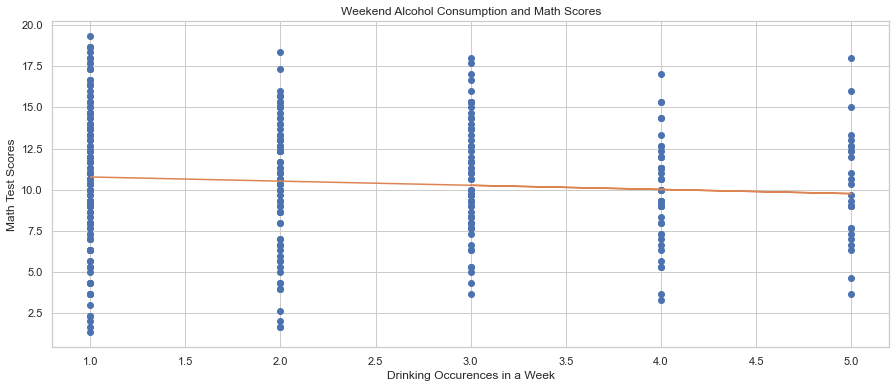

In [22]:
# Scatter Plot for Weekend Alcohol Consumption and Math Scores
plt.plot(student_res["Walc"],student_res["Average_Mat"], "o")
m, b = np.polyfit(student_res["Dalc"], student_res["Average_Mat"], 1)
plt.plot(student_res["Dalc"], m*student_res["Dalc"] + b)
plt.title("Weekend Alcohol Consumption and Math Scores")
plt.xlabel("Drinking Occurences in a Week")
plt.ylabel("Math Test Scores")

Text(0, 0.5, 'Portuguese Test Score')

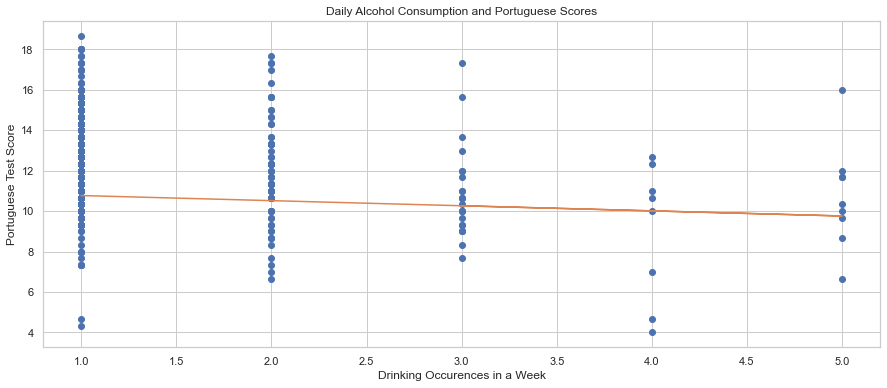

In [23]:
# Scatter Plot for Daily Alcohol Consumption and Portugese Scores
plt.plot(student_res["Dalc"],student_res["Average_Por"], "o")
m, b = np.polyfit(student_res["Dalc"], student_res["Average_Mat"], 1)
plt.plot(student_res["Dalc"], m*student_res["Dalc"] + b)
plt.title("Daily Alcohol Consumption and Portuguese Scores")
plt.xlabel("Drinking Occurences in a Week")
plt.ylabel("Portuguese Test Score")

Text(0, 0.5, 'Portuguese Test Score')

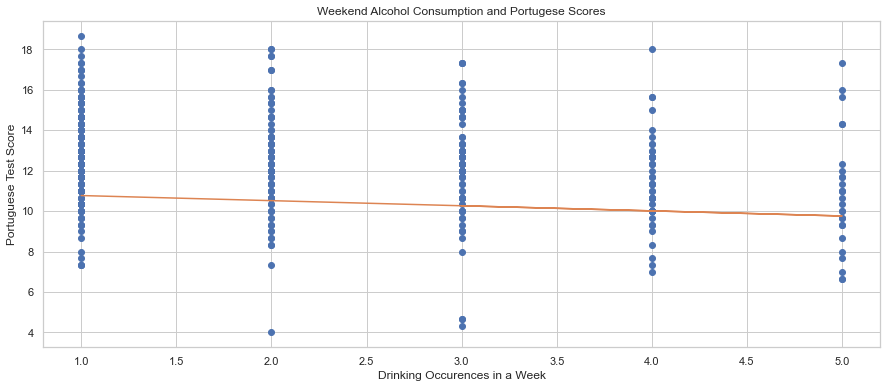

In [24]:
# Scatter Plot for Weekend Alcohol Consumption and Portugese Scores
plt.plot(student_res["Walc"],student_res["Average_Por"], "o")
m, b = np.polyfit(student_res["Dalc"], student_res["Average_Mat"], 1)
plt.plot(student_res["Dalc"], m*student_res["Dalc"] + b)
plt.title("Weekend Alcohol Consumption and Portugese Scores")
plt.xlabel("Drinking Occurences in a Week")
plt.ylabel("Portuguese Test Score")

What we see in the above graphs alligns with our hypothesis that students who drink more frequently generally have lower test scores. This is shown in our regression line which has a downwards slope indicating a decrease in tests scores as drinking occurences increases in a given week. The next step is we need to fit our data to the linear regression model. We do this by using the ols regression library to get the linear regression formula. We then fit our four above graphs to the formula(Dalc vs Average_Mat, Walc vs Average_Mat, Dalc vs Average_Por, Walc vs Average_Por). After we do this, we need to verify that our hypothesis is correct by performing an [F-test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda359.htm). In short, the purpose of the F-Test is to assure that our regression line fits our data well.

In [25]:
#Fit the four regressions
regression1 = ols(formula='Dalc ~ Average_Mat', data=student_res).fit()
regression2 = ols(formula='Walc ~ Average_Mat', data=student_res).fit()
regression3 = ols(formula='Dalc ~ Average_Por', data=student_res).fit()
regression4 = ols(formula='Walc ~ Average_Por', data=student_res).fit()

# Display first regression as visual, the following three will have a similar look to them
regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Dalc   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.349
Date:                Mon, 20 Dec 2021   Prob (F-statistic):              0.246
Time:                        18:39:58   Log-Likelihood:                -494.72
No. Observations:                 382   AIC:                             993.4
Df Residuals:                     380   BIC:                             1001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6229      0.136     11.922      0.000       1.355       1.891
Average_Mat    -0.0140      0.012     -1.161      0.246      -0.038       0.010
==============================================================================
Omnibus:                      185.479   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.743
Skew:                           2.235   Prob(JB):                    2.30e-156
Kurtosis:                       8.005   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Run ANOVA
result1 = sm.stats.anova_lm(regression1, typ=2)
result2 = sm.stats.anova_lm(regression2, typ=2)
result3 = sm.stats.anova_lm(regression3, typ=2)
result4 = sm.stats.anova_lm(regression4, typ=2)
result1

,sum_sq,df,F,PR(>F)
Average_Mat,1.058211,1.0,1.348582,0.246255
Residual,298.180009,380.0,NaN,NaN


In [27]:
result2

,sum_sq,df,F,PR(>F)
Average_Mat,2.486489,1.0,1.512893,0.219459
Residual,624.542307,380.0,NaN,NaN


In [28]:
result3

,sum_sq,df,F,PR(>F)
Average_Por,20.917525,1.0,28.559354,1.570076e-07
Residual,278.320695,380.0,NaN,NaN


In [29]:
result4

,sum_sq,df,F,PR(>F)
Average_Por,30.948651,1.0,19.729708,0.000012
Residual,596.080145,380.0,NaN,NaN


Result:

After running an F-test on the above models we notice the PR(>F) column on the outputted data. The coulumn consistently has a very small value on all four of the tests. This means that regression line was an accurate fit to our four graphs above meaning that our hypothesis that students who drink more generally perform worse in school is true based on the data we've been testing. 

## Machine Learning

At this point we are trying to predict a student's final grade based on the input information. Basically, what we're doing here is given a random student's input data. Can we predict if they passed their classes or not? A student is considered passing if they passed both their math and Portuguese courses. According to [studyineurope.eu](https://www.studyineurope.eu/study-in-portugal/grades) this is how Portugese grading distribution works:

- A 20-18
- B 17-16
- C 15-14
- D 13-12

So a student needs at least a 14/20 to be passing a course which is 70% and is roughly analogous to most U.S. grading scales. However, before we can process our data set we need to copy it to a temporary data set that only has integers and booleans to construct our classifiers.

In [30]:
# Some light cleaning
processed_data = student_res
del processed_data["Average_Mat"]
del processed_data["Average_Por"]

# Column to check if student is passing
processed_data['Passing?'] = pd.Series('', index=processed_data.index)

In [31]:
# Format instances to integers for data processing
for index, row in processed_data.iterrows():
    if (row["school"] == "GP"):
        processed_data.at[index,"school"] = 0
    else:
        processed_data.at[index,"school"] = 1
        
    if (row["sex"] == "F"):
        processed_data.at[index,"sex"] = 1
    else:
        processed_data.at[index,"sex"] = 0
        
    if (row["address"] == "U"):
        processed_data.at[index,"address"] = 1
    else:
        processed_data.at[index,"address"] = 0
        
    if (row["famsize"] == "GT3"):
        processed_data.at[index,"famsize"] = 1
    else:
        processed_data.at[index,"famsize"] = 0
        
    if (row["Pstatus"] == "A"):
        processed_data.at[index,"Pstatus"] = 0
    else:
        processed_data.at[index,"Pstatus"] = 1
        
    if (row["Mjob"] == "at_home"):
        processed_data.at[index,"Mjob"] = 0
        
    if (row["Mjob"] == "health"):
        processed_data.at[index, "Mjob"] = 1
        
    if (row["Mjob"] == "other"):
        processed_data.at[index, "Mjob"] = 2
        
    if (row["Mjob"] == "services"):
        processed_data.at[index, "Mjob"] = 3
    
    if (row["Mjob"] == "teacher"):
        processed_data.at[index, "Mjob"] = 4
        
    if (row["Fjob"] == "at_home"):
        processed_data.at[index,"Fjob"] = 0
        
    if (row["Fjob"] == "health"):
        processed_data.at[index, "Fjob"] = 1
        
    if (row["Fjob"] == "other"):
        processed_data.at[index, "Fjob"] = 2
        
    if (row["Fjob"] == "services"):
        processed_data.at[index, "Fjob"] = 3
    
    if (row["Fjob"] == "teacher"):
        processed_data.at[index, "Fjob"] = 4
        
    if (row["reason"] == "course"):
        processed_data.at[index, "reason"] = 0

    if (row["reason"] == "other"):
        processed_data.at[index, "reason"] = 1
        
    if (row["reason"] == "home"):
        processed_data.at[index, "reason"] = 2
        
    if (row["reason"] == "reputation"):
        processed_data.at[index, "reason"] = 3
        
    if (row["guardian"] == "mother"):
        processed_data.at[index, "guardian"] = 0
        
    if (row["guardian"] == "father"):
        processed_data.at[index, "guardian"] = 1
        
    if (row["guardian"] == "other"):
        processed_data.at[index, "guardian"] = 2
        
    if (row["schoolsup"] == "no"):
        processed_data.at[index,"schoolsup"] = 0
    else:
        processed_data.at[index,"schoolsup"] = 1
        
    if (row["famsup"] == "no"):
        processed_data.at[index,"famsup"] = 0
    else:
        processed_data.at[index,"famsup"] = 1
        
    if (row["paid"] == "no"):
        processed_data.at[index,"paid"] = 0
    else:
        processed_data.at[index,"paid"] = 1
        
    if (row["activities"] == "no"):
        processed_data.at[index,"activities"] = 0
    else:
        processed_data.at[index,"activities"] = 1
        
    if (row["nursery"] == "no"):
        processed_data.at[index,"nursery"] = 0
    else:
        processed_data.at[index,"nursery"] = 1
        
    if (row["higher"] == "no"):
        processed_data.at[index,"higher"] = 0
    else:
        processed_data.at[index,"higher"] = 1
        
    if (row["internet"] == "no"):
        processed_data.at[index,"internet"] = 0
    else:
        processed_data.at[index,"internet"] = 1
        
    if (row["romantic"] == "no"):
        processed_data.at[index,"romantic"] = 0
    else:
        processed_data.at[index,"romantic"] = 1
        
    if (row["G3_Mat"] > 13 and row["G3_Por"] > 13):
        processed_data.at[index,"Passing?"] = 1
    else:
        processed_data.at[index,"Passing?"] = 0
            

processed_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1_Mat,G2_Mat,G3_Mat,G1_Por,G2_Por,G3_Por,Passing?
0,0,1,18,1,1,0,4,4,0,4,...,1,3,6,5,6,6,0,11,11,0
1,0,1,17,1,1,1,1,1,0,2,...,1,3,4,5,5,6,9,11,11,0
2,0,1,15,1,0,1,1,1,0,2,...,3,3,10,7,8,10,12,13,12,0
3,0,1,15,1,1,1,4,2,1,3,...,1,5,2,15,14,15,14,14,14,1
4,0,1,16,1,1,1,3,3,2,2,...,2,5,4,6,10,10,11,13,13,0


### Decision Trees

Now that we have prepared our above data set we need to process it with a decision tree. First we convert our tree to a numpy array then we want to to get our target value, which is whether or not a student is passing the course. After we do this then we drop columns G1_Mat, G2_Mat, G3_Mat, G1,Por, G2_Por, and G3_Por because if the classifier knew these values then it would automatically know the answer. Then we separate the data into a training set and a test set. We train our decision tree in the training set and then after we're done training we can test.

[More information on decision trees](https://gdcoder.com/decision-tree-regressor-explained-in-depth/)

In [32]:
# Get the decision tree
clf = tree.DecisionTreeClassifier()

# Convert dataframe to numpy array
data = processed_data.to_numpy()

# Gather targets
target = np.asarray([row[36] for row in data])

# Drop Columns that contain the answers
data = np.delete(data,[30,31,32,33,34,35,36],1)

# Train
X_train, X_val, Y_train, Y_val = train_test_split(data,target,test_size=0.33,random_state=10)

# Fit training data
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [33]:
# Test
predictions = clf.predict(X_val)

# Oberserve results
count = 0
for x in range(len(predictions)):
    if Y_val[x] != predictions[x]:
        count += 1
print("# of total predictions: " + str(len(Y_val)))
print("% accuracy: " + str(float(len(Y_val)-count)/float(len(Y_val))))

# of total predictions: 127
% accuracy: 0.6929133858267716


Voila! from the above ML code we see that we are averaging around 70% prediction accuracy from 127 predictions. While it's not perfect, 70% accuracy isn't bad, in fact it's a passing grade. 

## Conclusion

Thank you for following this tutorial, I hope it was of some help to you. Again, this is just a introduction to the data science process there's many more aspects to this growing and exciting field. I hope the reader can use this tutorial to create their own analysis of various other data sets, or do a deeper analysis into this one :)